# Project: IMDB Data Analysis 
> The main objective of this project is to go through the data analysis process using Python libraries NumPy, pandas, and Matplotlib. 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset 
* I chose the TMDb movie dataset for data analysis, which contains information about 10866 movies along with their revenue, budget, and other useful information used in the analysis. <br>
 __Rows__: 10866 <br> 
 __Columns:__ 21 <br>


### Questions 
> <br>1. How many movies are released each year?<br><br>2. How many movies are realsed in each genre?<br><br>3. What are the genres of the movies released in 2011?<br><br>4. Do movies with high revenue receive higher rating?<br><br>5. Do movies with high budget generate higher revenue?<br><br>6. What is the highest and lowest movies in revenues?<br><br>7. What are the Highest 10 movies by revenue?<br><br>8. What are the longest 15 movies by duration?<br><br>9. Who are the movie director with highest movie releases?<br><br>10. Highest 10 Production compnaies by all time revenue?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties 

#### Loading and Cleaning data 

In [2]:
#loading data
df = pd.read_csv('tmdb-movies.csv', parse_dates=['release_date'])
df.head(2)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
df.shape

(10866, 21)

#### Exploring Data Types 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### Data Cleaning (Removing Unused Data)
> 1. Dropping columns with unused infromation<br> 
2. Dealing with Duplicated values<br>
3. Dealing with missing values<br>
4. Dealing with zero values in revenue and budget column<br> 

__1. Dropping columns with unused infromation__

In [7]:
#dropping values not needed in the analysis 
df.drop(['imdb_id','tagline','overview','revenue_adj','budget_adj','homepage','keywords','vote_count','cast'],axis=1 ,inplace=True)
df.head(2)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015


In [8]:
print('Dataset after dropping unused columns: ', df.shape)

Dataset after dropping unused columns:  (10866, 12)


__2. Dealing with duplicated values:__

In [9]:
# how many rows with duplicated values 
df.duplicated().sum()

1

In [10]:
#drop duplicated rows
df.drop_duplicates(inplace = True)


In [11]:
# how many rows with duplicated values 
df.duplicated().sum()

0

__3. Dealing with missing values:__

In [12]:
#how many rows with null values 
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_average               0
release_year               0
dtype: int64

__4. Dealing with zero values in revenue and budget column__  

Looking at the data, I noticed that there are alot of values in the "Budget" and "Revenue" coloumn filled with zero values,at first I deceided to fill in missing values with mean:

<code>rev_mean = int(df.revenue.mean())
df.revenue.replace(0,np.nan,inplace=True)
df.revenue.fillna(rev_mean,inplace=True)
</code>

but this could lead to incorrect results of analysis because the values are not accurate, therefore, I chose to drop values that contain zero in "Revenue" and "Budget" column.

In [13]:
zero_rev = df['revenue']==0
zero_budget= df['budget']==0

print('Number of rows with zero revenue: ',zero_rev.sum()) 
print('Number of rows with zero budget: ',zero_budget.sum()) 

Number of rows with zero revenue:  6016
Number of rows with zero budget:  5696


__Dealing with revenue column__ 

In [14]:
#replacing zero values with null in revenue column
df.revenue.replace(0,np.nan,inplace=True)

In [15]:
#replacing zero values with null in revenue column
df.budget.replace(0,np.nan,inplace=True)

In [16]:
#after replacing data type is changed to float 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                5169 non-null   float64       
 3   revenue               4849 non-null   float64       
 4   original_title        10865 non-null  object        
 5   director              10821 non-null  object        
 6   runtime               10865 non-null  int64         
 7   genres                10842 non-null  object        
 8   production_companies  9835 non-null   object        
 9   release_date          10865 non-null  datetime64[ns]
 10  vote_average          10865 non-null  float64       
 11  release_year          10865 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.1+ M

In [17]:
# dropping all null values 
df.dropna(axis=0,inplace=True)

In [18]:
#converting float to int 
df['budget'] = df['budget'].astype(np.int64)  
df['revenue'] = df['revenue'].astype(np.int64)  

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3807 non-null   int64         
 1   popularity            3807 non-null   float64       
 2   budget                3807 non-null   int64         
 3   revenue               3807 non-null   int64         
 4   original_title        3807 non-null   object        
 5   director              3807 non-null   object        
 6   runtime               3807 non-null   int64         
 7   genres                3807 non-null   object        
 8   production_companies  3807 non-null   object        
 9   release_date          3807 non-null   datetime64[ns]
 10  vote_average          3807 non-null   float64       
 11  release_year          3807 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 386.6+ 

In [20]:
df.shape

(3807, 12)

In [21]:
#confirm there are no null values 
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_average            0
release_year            0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### 1. How many movies are realsed each year ? 

Text(0,0.5,'Number of Movies')

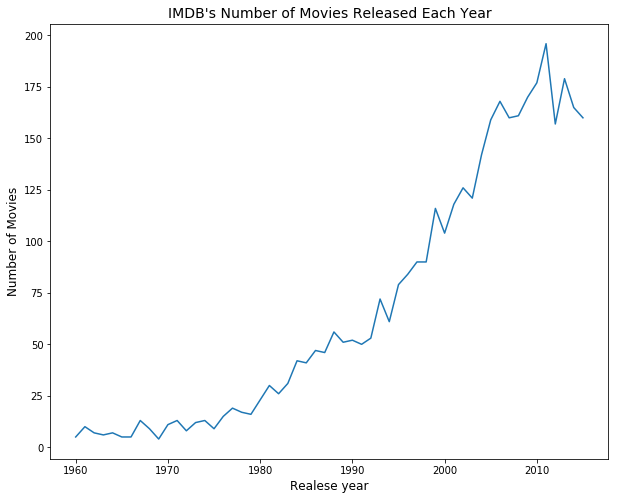

In [22]:
#how many movies are realsed each year
year_count = df.groupby(['release_year'])['id'].count()

#plot 
year_count.plot(kind='line',figsize=(10,8)) 
plt.title("IMDB's Number of Movies Released Each Year", fontsize=14) 
plt.xlabel("Realese year", fontsize=12) 
plt.ylabel("Number of Movies",fontsize=12) 

>The graph indicates that the number of movies released each is increasing over the years, and there has been a slight decrease in the number of movies after the year 2010.  To explore further I wanted to see which year has the most number of movie releases. 

In [23]:
#get the year that has the highest number of movie releases. 
max_year = year_count.idxmax()
# count how many movies 
number_of_movies = year_count.max()

In [24]:
print('The highest realses in movies was in', max_year ,'with',number_of_movies, 'movies')

The highest realses in movies was in 2011 with 196 movies


In [25]:
#confirm results 
movies_2011 = df.query('release_year == 2011')
movies_2011.shape

(196, 12)

 ### 2. How many movies are released in each genre?

Text(0,0.5,'Genres (Movies Can Contain Multiple Genres) ')

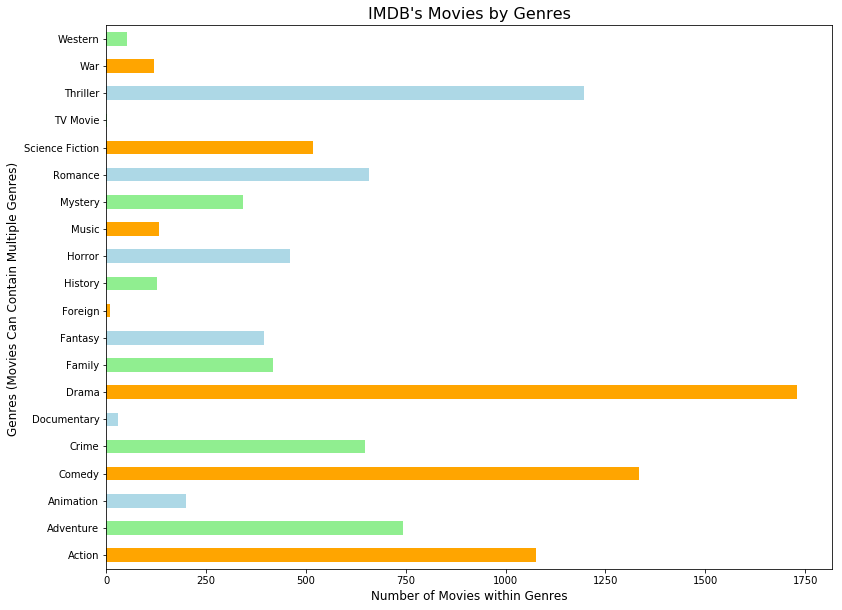

In [26]:
#seperate the genres and count their occurence in the row 
dummies = df['genres'].str.get_dummies(sep='|')
#plot 
dummies.sum().plot(kind="barh",figsize=(13,10),color=['orange', 'lightgreen', 'lightblue'])
plt.title("IMDB's Movies by Genres", fontsize=16) 
plt.xlabel("Number of Movies within Genres", fontsize=12) 
plt.ylabel("Genres (Movies Can Contain Multiple Genres) ",fontsize=12) 

> The graph shows that genres ordered by the highest; Darma, Comedy, and Thriller has the highest number of releases in movies.  

### 3. What are the most movie genres realsed in 2011? 

To explore further, I wanted to check the genres of movies released in 2011. 

Text(0,0.5,'Genres (Movies Can Contain Multiple Genres) ')

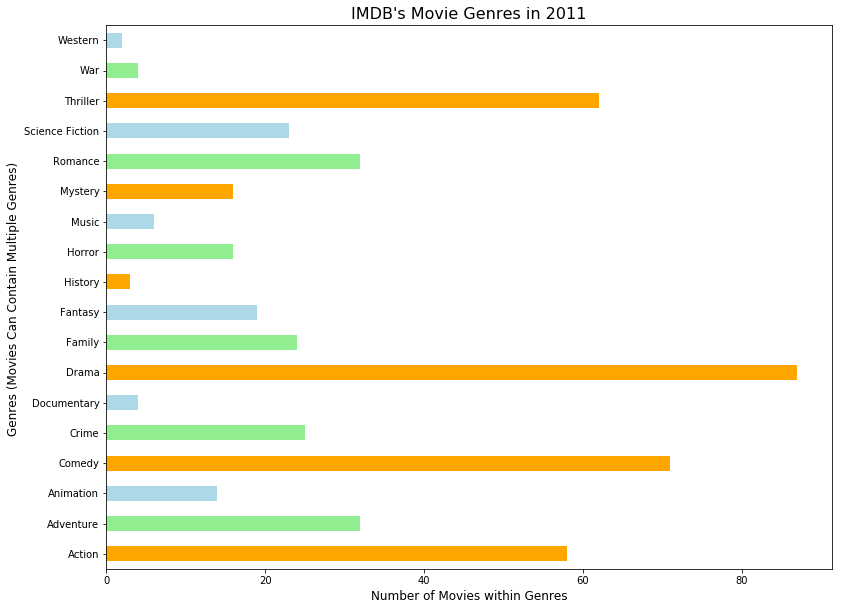

In [27]:
#seperate the genres and count their occurence in the row 
dummies = movies_2011['genres'].str.get_dummies(sep='|')

dummies.sum().plot(kind="barh",figsize=(13,10),color=['orange', 'lightgreen', 'lightblue'])
plt.title("IMDB's Movie Genres in 2011", fontsize=16) 
plt.xlabel("Number of Movies within Genres", fontsize=12) 
plt.ylabel("Genres (Movies Can Contain Multiple Genres) ",fontsize=12) 


> The graph shows that genres ordered by the highest; Darma, Comedy, Thriller and Action has the highest number of releases in 2011.

### 4. Do movies with high revenue receive higher rating?

In [28]:
#calculate median for revenue
df.revenue.median()

46201432.0

In [29]:
#select samples with revenue less the median
low_revenue = df.query('revenue < 39826896.0')

# select samples with revenue greater than or equal to the median
high_revenue = df.query('revenue >= 39826896.0')

num_samples = df.shape[0]
# ensure these queries included each sample exactly once
num_samples == low_revenue['vote_average'].count() + high_revenue['vote_average'].count() # should be True 

True

In [30]:
low_revenue.vote_average.mean(), high_revenue.vote_average.mean()

(6.024434389140287, 6.296665031878366)

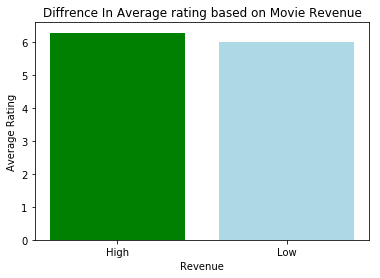

In [31]:
#store values for low voting average mean 
lower= low_revenue.vote_average.mean()
#store values for high voting average mean 
higher=high_revenue.vote_average.mean()

#x axis labels 
x = ['High', 'Low'] 
#y axis values 
rate = [higher,lower]
#x axis labels 
x_pos = [i for i, _ in enumerate(x)]
# plot
plt.bar(x_pos, rate, color=['green','lightblue'])
plt.xlabel("Revenue")
plt.ylabel("Average Rating")
plt.title("Diffrence In Average rating based on Movie Revenue")

plt.xticks(x_pos, x)

plt.show()

> There is a slight diffrence in movie ratings for high revenue and low revenue movies. High revenue movies has an average rating of 6.30 voting average which higher than movies with low revenue 6 voting average.

### 5. Do movies with high budget generate higher revenue?

In [32]:
#calculate median for budget
df.budget.median()

25000000.0

In [33]:
# select samples with budget less than the median
low_budget = df.query('budget < 25000000.0')

# select samples with vote_average greater than or equal to the median
high_budget = df.query('budget >= 25000000.0')

num_samples = df.shape[0]
# ensure these queries included each sample exactly once
num_samples == low_budget['revenue'].count() + high_budget['revenue'].count() # should be True 

True

In [34]:
low_budget.revenue.mean(), high_revenue.revenue.mean()

(41274768.94479495, 190567827.3334968)

> Movies with lower budget has an average revenue of __41274768__ which is less than the average of movies with higher budget of __190567827__

### 6. What is the highest and lowest movies in revenues?

In [35]:
#select row that have highest revenue
max_rev = df.loc[df['revenue'].idxmax()]

In [36]:
print('Movie with the highest revenues is' , max_rev['original_title'], 'with an average rating of', max_rev['vote_average'] , 'stars' )

Movie with the highest revenues is Avatar with an average rating of 7.1 stars


In [37]:
#select row that have the lowest revenue 
min_rev = df.loc[df['revenue'].idxmin()]

In [38]:
print('Movie with the lowest revenues is' , min_rev['original_title'], 'with an average rating of', min_rev['vote_average'] , 'stars' )

Movie with the lowest revenues is Shattered Glass with an average rating of 6.4 stars


> __The `plotbarh_sum` function plots a horizontal bar with the largest (n)th values based on user input, it takes an input of a categorical data (x) and numerical data (y), the fuction groups data by the categorical column and calculate the sum of numerical data and select the (n) which is how many rows will apear in the result and plot the result in a horizontal bar.__   

In [39]:
def plotbarh_sum(x,y,number,title,x_label,y_label):
    #select rows with largest values in numerical data based on number of result 
    r = df.nlargest(number, x) 
    #group by categorical data and calculate sum of numerical value 
    run_bar_plot = r.groupby([y])[[x]].sum().sort_values(y) 
    #plot 
    run_bar_plot.plot(kind="barh",figsize=(10,8))
    plt.title(title, fontsize=14) 
    plt.xlabel(x_label, fontsize=13) 
    plt.ylabel(y_label,fontsize=13) 

### 7. What are the highest 10 movies by revenue?

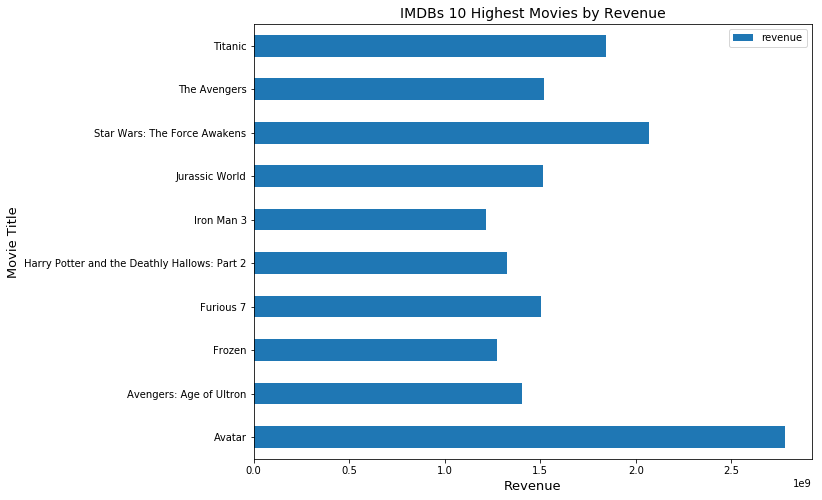

In [40]:
#call plotbarh function
plotbarh_sum('revenue','original_title',10,"IMDBs 10 Highest Movies by Revenue","Revenue","Movie Title")

> The graph shows that movies ordered by the highest; Avatar, Star Wars: The Force Awakens and Titanic has the highest revenues.

### 8. What are the longest 15 movies by duration?

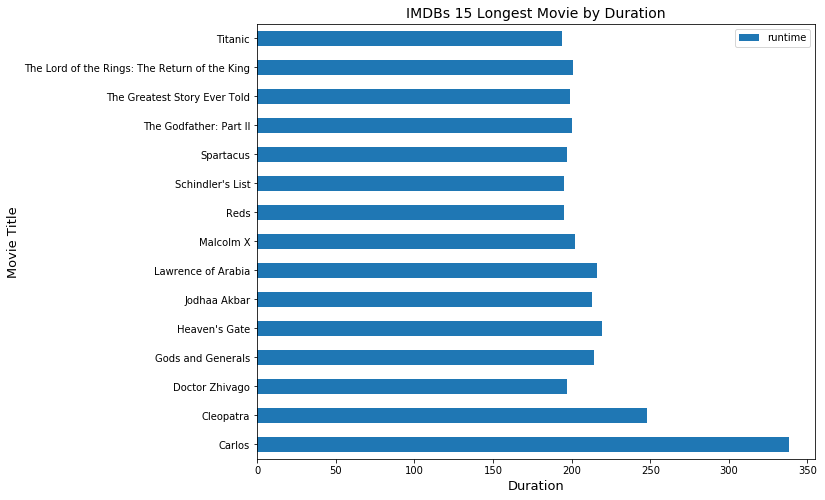

In [41]:
#call plotbarh function
plotbarh_sum('runtime','original_title',15,"IMDBs 15 Longest Movie by Duration","Duration","Movie Title")

> The graph shows that movies ordered by longest duration; Carlos, Cleopatra and Lawrence of Arabia has the longest duration. 

### 9. Who are the movie director with highest movie releases? 

Text(0,0.5,'Director')

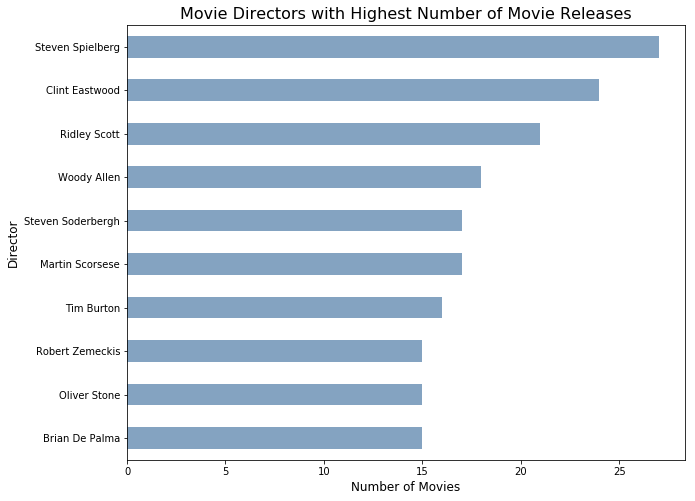

In [42]:
#get the values of directors grouped and count their movies 
director = df.groupby(['director'])['id'].count().sort_values().tail(10)
#plot
director.plot(kind="barh",figsize=(10,8),color=(0.2, 0.4, 0.6, 0.6))
plt.title("Movie Directors with Highest Number of Movie Releases", fontsize=16) 
plt.xlabel("Number of Movies", fontsize=12) 
plt.ylabel("Director",fontsize=12) 


> The graph shows that __Steven Speilberg__ has directed more than 25 movies.

### 10. Highest 10 Production compnaies by all time revenue?  

Text(0,0.5,'Production Companies ')

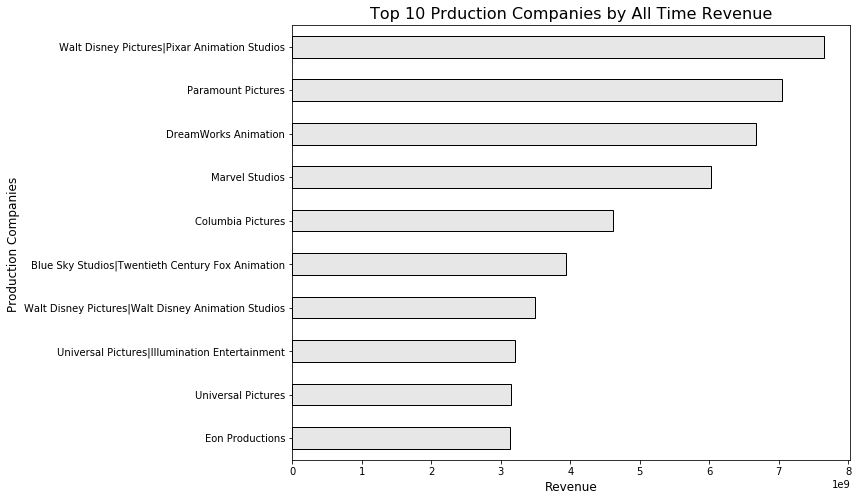

In [43]:
#get the values of production companies grouped and sum their revenue  
top_production = df.groupby(['production_companies'])['revenue'].sum().sort_values().tail(10)

top_production.plot(kind="barh", figsize=(10,8), color=(0.1, 0.1, 0.1, 0.1),  edgecolor='black')
plt.title("Top 10 Prduction Companies by All Time Revenue", fontsize=16) 
plt.xlabel("Revenue", fontsize=12) 
plt.ylabel("Production Companies ",fontsize=12) 


> Walt Disney Pictures | Pixar Animantion Studios have the highest all time revenue. 

<a id='conclusions'></a>
## Conclusions

>1. Number of movies released each is increasing over the years, and there has been a slight decrease in the number of movies after the year 2010<br><br> 
2. Darma, Comedy, and Thriller has the highest number of releases in movies.<br><br> 
3. Darma, Comedy, Thriller and Action has the highest number of releases in 2011<br><br> 
4. There is a slight diffrence in movie rating for high revenue and low revenue movies.<br><br> 
5. Movies with higher budget has a higher revenue average than movies with lower budget.<br><br> 
6. Avatar is the highest movie in revenue, and Shattered Glass is the lowest movie in revenue. <br><br> 
7. Avatar, Star Wars: The Force Awakens and Titanic are the highest movies in revenue.<br><br> 
8. Carlos, Cleopatra and Lawrence of Arabia have the longest movie duration.<br><br> 
9. Steven Speilberg has directed more than 25 movies.<br><br> 
10. Walt Disney Pictures | Pixar Animantion Studios have the highest all time revenue. 

 ### Limitations 
>1. Lack of documentation provided with the dataset, which describes each column.<br>
2. It is not clear what is currencey used in the budget and revenue. 